## Twitter Sentiment Analysis of iPhone XS and iPhone XR using Python 

#### What is sentiment analysis?
Sentiment Analysis is the process of ‘computationally’ determining whether a piece of writing is positive, negative or neutral. It’s also known as opinion mining, deriving the opinion or attitude of a speaker.

#### Why sentiment analysis?

In marketing field companies use it to develop their strategies, to understand customers’ feelings towards products or brand, how people respond to their campaigns or product launches and why consumers don’t buy some
products.

I have made use of following libraries and client to perform Sentiment Analysis

     Tweepy: It is the python client for the official Twitter API.
     TextBlob: It is a python library for processing textual data.

Also, I have made use of NLTK corpora which is nothing  but a large and structured set of texts.


Authentication:
In order to fetch tweets through Twitter API, one needs to register an App through their twitter account. Follow these steps for the same:

Open this link and click the button: ‘Create New App’
Fill the application details. You can leave the callback url field empty.
Once the app is created, you will be redirected to the app page.
Open the ‘Keys and Access Tokens’ tab.
Copy ‘Consumer Key’, ‘Consumer Secret’, ‘Access token’ and ‘Access Token Secret’.

In [2]:
import re 
import matplotlib.pyplot as plt 
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import numpy as np

class TwitterClient(object): 
    ''' 
    Generic Twitter Class for sentiment analysis. 
    '''
    def __init__(self):
        ''' 
        Class constructor or initialization method. 
        '''
        # keys and tokens from the Twitter Dev Console 
        consumer_key = 'hnjI1KEt7hKfuGB4ccJfd3WCl'
        consumer_secret = 'gA4baG8GRJtQUiUmObSHaHPgjtwquLTUUTVwCihffxtf9j6dGG'
        access_token = '163056342-DSgdl0jvOjFVNBLw5f5FVtd9qI81zSOmYiwenKwh'
        access_token_secret = '5IFPsRDTYmHcVSwgeZ6sy0vgvYMthjvuvpDjTsxW01S92'

        # attempt authentication 
        try: 
            # create OAuthHandler object 
            self.auth = OAuthHandler(consumer_key, consumer_secret) 
            # set access token and secret 
            self.auth.set_access_token(access_token, access_token_secret) 
            # create tweepy API object to fetch tweets 
            self.api = tweepy.API(self.auth) 
        except: 
            print("Error: Authentication Failed") 

    def clean_tweet(self, tweet): 
        ''' 
        Utility function to clean tweet text by removing links, special characters 
        using simple regex statements. 
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split()) 

    def get_tweet_sentiment(self, tweet): 
        ''' 
        Utility function to classify sentiment of passed tweet 
        using textblob's sentiment method 
        '''
        # create TextBlob object of passed tweet text 
        analysis = TextBlob(self.clean_tweet(tweet)) 
        # set sentiment 
        if analysis.sentiment.polarity > 0: 
            return 'positive'
        elif analysis.sentiment.polarity == 0: 
            return 'neutral'
        else: 
            return 'negative'

    def get_tweets(self, query, count = 10): 
        ''' 
        Main function to fetch tweets and parse them. 
        '''
        # empty list to store parsed tweets 
        tweets = [] 

        try: 
            # call twitter api to fetch tweets 
            fetched_tweets = self.api.search(q = query, count = count, lang='en') 

            # parsing tweets one by one 
            for tweet in fetched_tweets: 
                # empty dictionary to store required params of a tweet 
                parsed_tweet = {} 

                # saving text of tweet 
                parsed_tweet['text'] = tweet.text 
                # saving sentiment of tweet 
                parsed_tweet['sentiment'] = self.get_tweet_sentiment(tweet.text) 

                # appending parsed tweet to tweets list 
                if tweet.retweet_count > 0: 
                    # if tweet has retweets, ensure that it is appended only once 
                    if parsed_tweet not in tweets: 
                        tweets.append(parsed_tweet) 
                else: 
                    tweets.append(parsed_tweet) 

            # return parsed tweets 
            return tweets 

        except tweepy.TweepError as e: 
            # print error (if any) 
            print("Error : " + str(e)) 



 


iPHONE XS:
Positive tweets percentage: 57.142857142857146 %
Negative tweets percentage: 12.698412698412698 %
Neutral tweets percentage: 30.158730158730158 % 
 


iPHONE XR:
Positive tweets percentage: 36.0 %
Negative tweets percentage: 8.0 %
Neutral tweets percentage: 56.0 % 
 




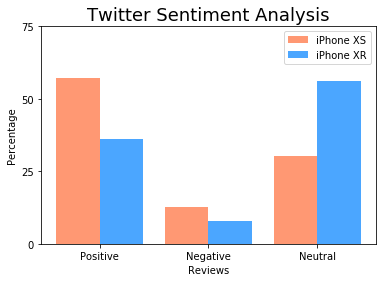

In [6]:
def main(): 
    # creating object of TwitterClient Class 
    api = TwitterClient() 
    # calling function to get tweets 
    tweets_XS = api.get_tweets(query = 'Iphone XS', count = 5000)
    tweets_XR = api.get_tweets(query = 'Iphone XR', count = 5000)
    
    print(" \n\n")  
    print("iPHONE XS:")
    # picking positive tweets from tweets 
    ptweets_XS = [tweet for tweet in tweets_XS if tweet['sentiment'] == 'positive'] 
    # percentage of positive tweets 
    print("Positive tweets percentage: {} %".format(100*len(ptweets_XS)/len(tweets_XS))) 
    pper_XS = (100*len(ptweets_XS)/len(tweets_XS))
    
    # picking negative tweets from tweets
    ntweets_XS = [tweet for tweet in tweets_XS if tweet['sentiment'] == 'negative'] 
    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets_XS)/len(tweets_XS))) 
    nper_XS = (100*len(ntweets_XS)/len(tweets_XS))
    
    # picking neutral tweets from tweets 
    neutraltweets_XS = [tweet for tweet in tweets_XS if tweet['sentiment'] == 'neutral'] 
    # percentage of neutral tweets 
    print("Neutral tweets percentage: {} % ".format(100*len(neutraltweets_XS)/len(tweets_XS))) 
    neuper_XS = (100*len(neutraltweets_XS)/len(tweets_XS))
    
    print(" \n\n")
   
    print("iPHONE XR:")    
    # picking positive tweets from tweets 
    ptweets_XR = [tweet for tweet in tweets_XR if tweet['sentiment'] == 'positive'] 
    # percentage of positive tweets 
    print("Positive tweets percentage: {} %".format(100*len(ptweets_XR)/len(tweets_XR))) 
    pper_XR = (100*len(ptweets_XR)/len(tweets_XR))
    
    # picking negative tweets from tweets
    ntweets_XR = [tweet for tweet in tweets_XR if tweet['sentiment'] == 'negative'] 
    # percentage of negative tweets 
    print("Negative tweets percentage: {} %".format(100*len(ntweets_XR)/len(tweets_XR))) 
    nper_XR = (100*len(ntweets_XR)/len(tweets_XR))
    
    # picking neutral tweets from tweets 
    neutraltweets_XR= [tweet for tweet in tweets_XR if tweet['sentiment'] == 'neutral'] 
    # percentage of neutral tweets 
    print("Neutral tweets percentage: {} % ".format(100*len(neutraltweets_XR)/len(tweets_XR))) 
    neuper_XR = (100*len(neutraltweets_XR)/len(tweets_XR))
    
      
    print(" \n\n")
    
    group_names=['Positive', 'Negative', 'Neutral']
       
    group_XS=[pper_XS,nper_XS,neuper_XS]
    group_XR=[pper_XR,nper_XR,neuper_XR]
 
    fig, ax = plt.subplots()
    groups = 3
    bar_width = 0.4
    opacity = 0.8
    index = np.arange(groups)

    rect1 = plt.bar(index, group_XS, bar_width,alpha=opacity,color='coral',label='iPhone XS')
    rect2 = plt.bar(index + bar_width, group_XR, bar_width,alpha=opacity,color='dodgerblue',label='iPhone XR')
    
    plt.title('Twitter Sentiment Analysis', fontsize=18)
    plt.xlabel('Reviews')
    plt.ylabel('Percentage')
    
    plt.xticks(index+0.2, ('Positive','Negative','Neutral'))
    ax.set_yticks([0, 25, 50, 75])
    plt.legend()
    
    # printing first 5 positive tweets 
 #   print("\n\nPositive tweets:") 
 #  for tweet in ptweets[:5]: 
 #       print(tweet['text']) 

    # printing first 5 negative tweets 
 #   print("\n\nNegative tweets:") 
 #   for tweet in ntweets[:5]: 
 #       print(tweet['text']) 
     
if __name__ == "__main__": 
    # calling main function
    main() 
